In [1]:
import tensorflow as tf
print("GPU available: ", tf.config.list_physical_devices('GPU'))

GPU available:  []


In [4]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, LSTM, Dropout, Embedding, Dense, Bidirectional,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, CategoricalAccuracy, Recall
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
%%time
import pandas as pd

dataset = pd.read_csv('train.csv')
dataset.head()

CPU times: total: 29.9 s
Wall time: 31.2 s


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


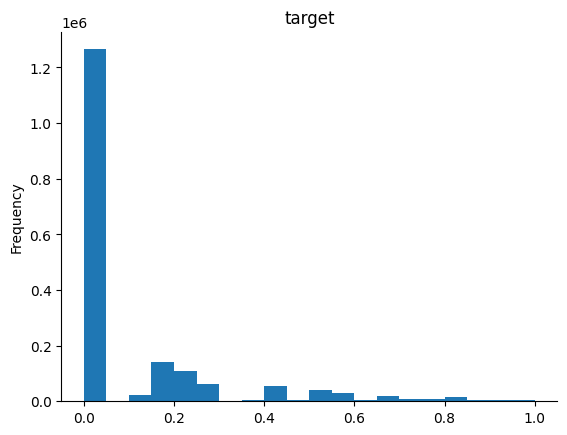

In [ ]:
from matplotlib import pyplot as plt
dataset['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-37-d785d067cc18>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['target'], kde=True, hist=False, bins=240, label='target')


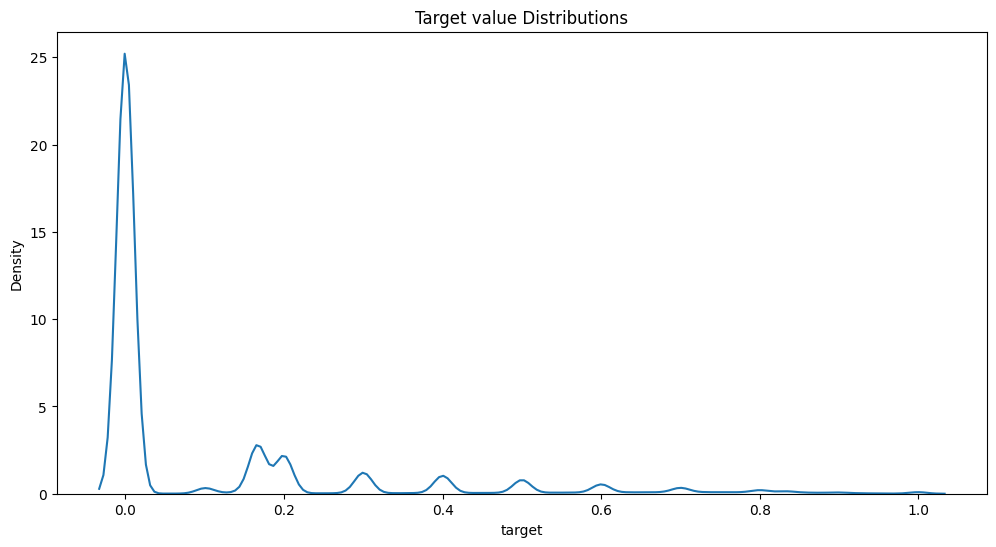

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Target value Distributions")
sns.distplot(dataset['target'], kde=True, hist=False, bins=240, label='target')
plt.show()

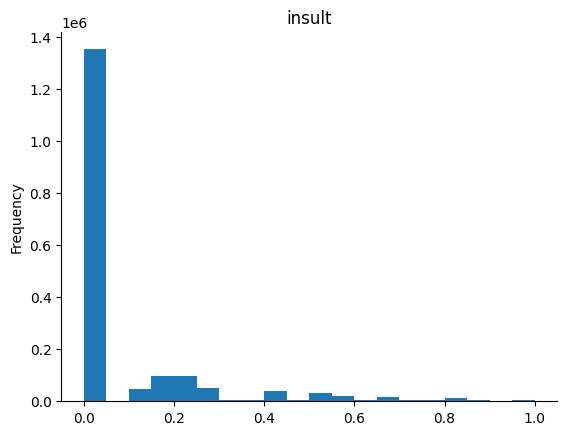

In [ ]:
from matplotlib import pyplot as plt
dataset['insult'].plot(kind='hist', bins=20, title='insult')
plt.gca().spines[['top', 'right',]].set_visible(False)

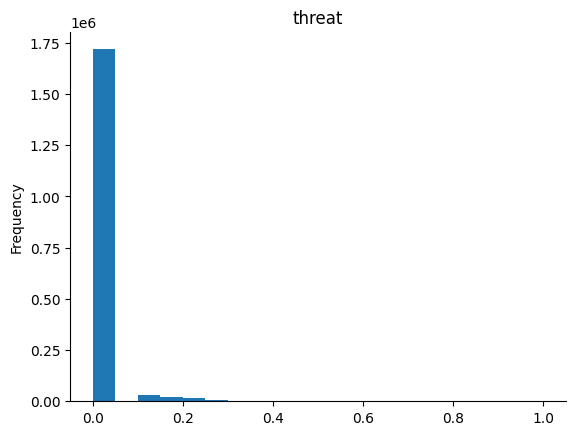

In [ ]:
from matplotlib import pyplot as plt
dataset['threat'].plot(kind='hist', bins=20, title='threat')
plt.gca().spines[['top', 'right',]].set_visible(False)

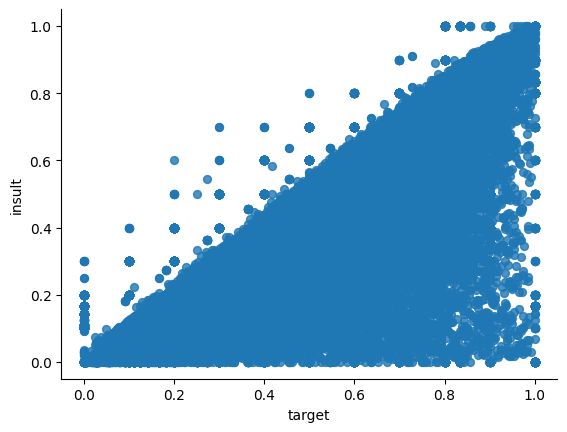

In [ ]:
from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='target', y='insult', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

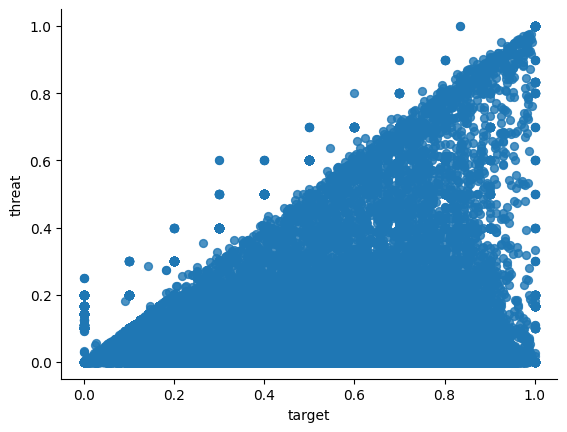

In [ ]:
from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='target', y='threat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset[(dataset['target'] >= 0.5) & (dataset['target'] <= 0.7)][['target' ,'comment_text', 'insult', 'threat']].head(15)

,target,comment_text,insult,threat
5,0.666667,ur a sh*tty comment.,0.333333,0.0
13,0.600000,It's ridiculous that these guys are being call...,0.600000,0.1
14,0.500000,This story gets more ridiculous by the hour! A...,0.300000,0.0
19,0.500000,"Angry trolls, misogynists and Racists"", oh my....",0.500000,0.0
84,0.500000,"Tuesday Jan. 13, members of \nthis socalled 'm...",0.500000,0.0
105,0.600000,Love that they also participate in the Portlan...,0.600000,0.0
123,0.700000,Took this as an opportunity to check back in o...,0.700000,0.0
188,0.600000,Their ridiculous band photo has me wanting to ...,0.500000,0.0
189,0.500000,“Will Whiteness History Month make all white p...,0.300000,0.0
212,0.600000,"""Anybody who can kiss that many asses, that qu...",0.500000,0.0


In [ ]:
dataset.size

81219330

In [ ]:
dataset.shape

(1804874, 45)

In [ ]:
cols = dataset.columns
cols

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [72]:
from wordcloud import WordCloud, STOPWORDS

stpwrds = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stpwrds,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [5]:
#

only_toxic_comments_df = dataset[dataset['target'] >= 0.5]
only_toxic_comments_df.shape

(144334, 45)

In [ ]:
144334/3

48111.333333333336

In [6]:
only_non_toxic_comments_df = dataset[dataset['target'] < 0.5]
only_non_toxic_comments_df.shape

(1660540, 45)

In [7]:
only_toxic_comments_df.to_csv('only_toxic_comments_df.csv')
only_non_toxic_comments_df.to_csv('only_non_toxic_comments_df.csv')

In [ ]:
only_non_toxic_comments_df.head(50)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.0,0.254237,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4
10,239578,0.000000,"Wow, that sounds great.",0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,...,26650,approved,0,0,0,0,0,0.000000,0,4
11,239579,0.440000,This is a great story. Man. I wonder if the pe...,0.000000,0.293333,0.0,0.320000,0.000000,0.0,0.0,...,26650,approved,0,0,0,1,0,0.040000,10,75


In [74]:
# Loading saved dataset containing toxic and non-toxic comments separately

import pandas as pd

only_toxic_comments_df = pd.read_csv('only_toxic_comments_df.csv')
only_non_toxic_comments_df = pd.read_csv('only_non_toxic_comments_df.csv')

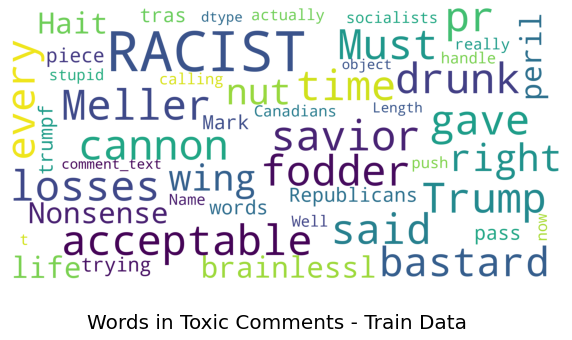

In [99]:
show_wordcloud(only_toxic_comments_df['comment_text'].sample(2000), title = 'Words in Toxic Comments - Train Data')

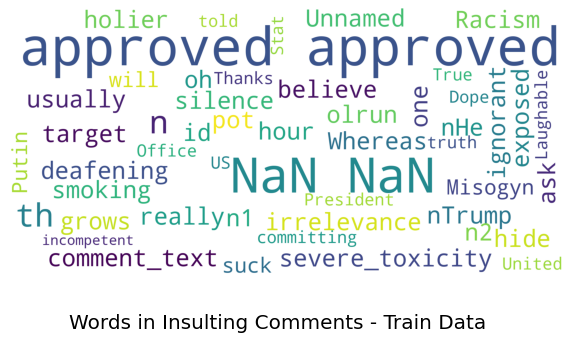

In [96]:
show_wordcloud(only_toxic_comments_df[only_toxic_comments_df['insult'] >= 0.5].sample(2000), title = 'Words in Insulting Comments - Train Data')

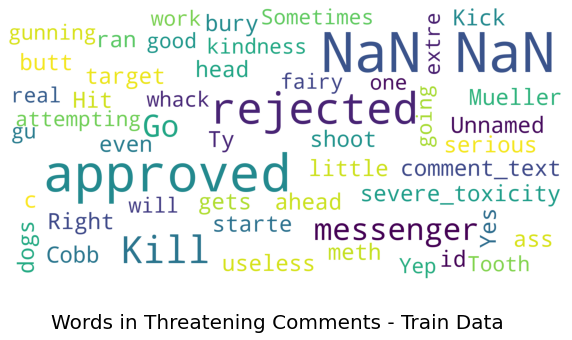

In [95]:
show_wordcloud(only_toxic_comments_df[only_toxic_comments_df['threat'] >= 0.5].sample(500), title = 'Words in Threatening Comments - Train Data')

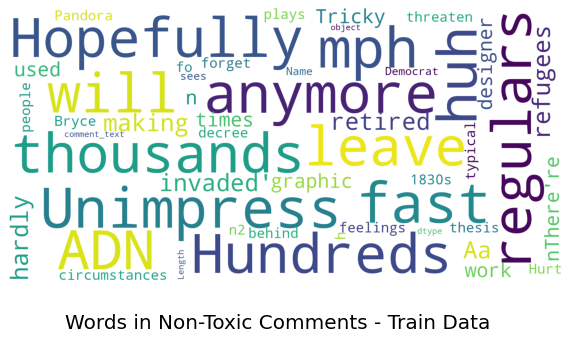

In [98]:
show_wordcloud(only_non_toxic_comments_df['comment_text'].sample(20000), title = 'Words in Non-Toxic Comments - Train Data')

In [8]:
nt0 = only_non_toxic_comments_df[(only_non_toxic_comments_df['target'] >= 0.1) & (only_non_toxic_comments_df['target'] <= 0.25)]
nt0.shape

(270351, 45)

In [9]:
nt1 = only_non_toxic_comments_df[(only_non_toxic_comments_df['target'] >= 0.4) & (only_non_toxic_comments_df['target'] <= 0.45)]
nt1.shape

(53461, 45)

In [10]:
nt2 = only_non_toxic_comments_df[(only_non_toxic_comments_df['target'] >= 0) & (only_non_toxic_comments_df['target'] <= 0.09)]
nt2.shape

(1266048, 45)

In [11]:
nt0 = nt0[:50000]
nt1 = nt1[:50000]
nt2 = nt2[:50000]

In [12]:
new_non_toxic_df = pd.concat([nt0, nt1, nt2], axis=0)
new_non_toxic_df.shape

(150000, 45)

In [13]:
manually_resampled_dataset = pd.concat([new_non_toxic_df, only_toxic_comments_df], axis=0)
manually_resampled_dataset.shape

(294334, 45)

<ipython-input-36-a7ee833b2b2b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(manually_resampled_dataset['target'], kde=True, hist=False, bins=240, label='target')


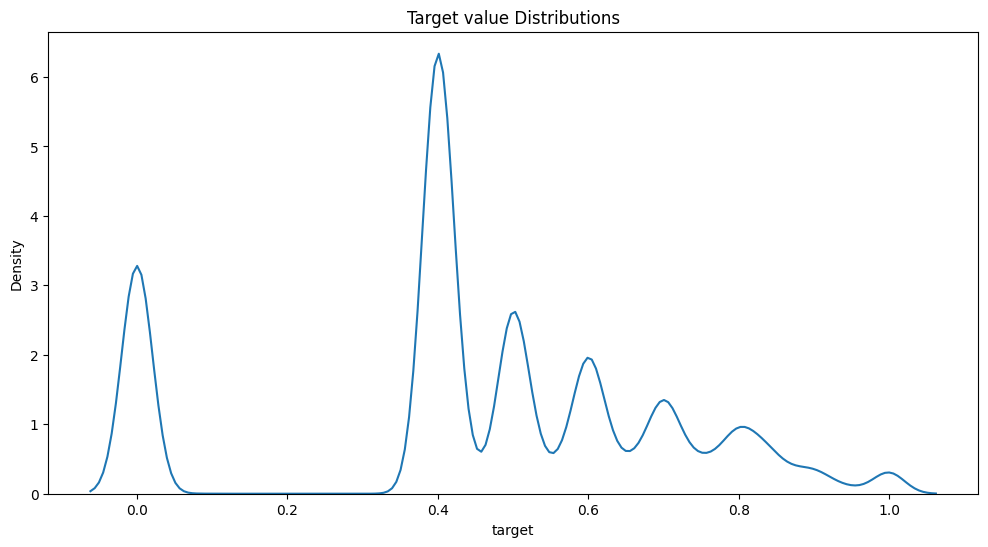

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Target value Distributions")
sns.distplot(manually_resampled_dataset['target'], kde=True, hist=False, bins=240, label='target')
plt.show()

In [ ]:
# # Downsampling

# # Separate features and target variable
# # X = dataset.drop(['target'], axis=1)
# # y = dataset['target']

# # Identify the minority class
# minority_class = dataset[dataset['target'] > 0.1]

# # Randomly sample the majority class to match the minority class size
# majority_class = dataset[dataset['target'] <= 0.1].sample(n=len(minority_class), random_state=42)

# # Concatenate the minority and majority classes
# resampled_dataset = pd.concat([minority_class, majority_class])

# # Check the class distribution after downsampling
# # print(resampled_dataset['target'].value_counts())
# print("Dataset Resampled...")

Dataset Resampled...


In [ ]:
# resampled_dataset.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
11,239579,0.440000,This is a great story. Man. I wonder if the pe...,0.000000,0.293333,0.000000,0.320000,0.0,0.0,0.0,...,26650,approved,0,0,0,1,0,0.040000,10,75
13,239583,0.600000,It's ridiculous that these guys are being call...,0.000000,0.100000,0.000000,0.600000,0.1,NaN,NaN,...,26670,approved,0,0,0,3,0,0.000000,0,10


In [ ]:
# resampled_dataset.shape

(1048108, 45)

In [ ]:
# import numpy as np

# # Randomly sample 30% of the data
# dataset = resampled_dataset.sample(frac=0.5, random_state=42)
# dataset.shape

(206991, 45)

In [ ]:
# X = resampled_dataset['comment_text']
# y = resampled_dataset[['target', 'insult', 'threat']].values

In [14]:
manually_resampled_dataset.to_csv('manually_resampled_dataset.csv')

In [3]:
# Load manually_resampled_dataset :

import pandas as pd

manually_resampled_dataset = pd.read_csv('manually_resampled_dataset.csv')

In [5]:
manually_resampled_dataset.shape

(294334, 46)

In [16]:
X = manually_resampled_dataset['comment_text']
# y = manually_resampled_dataset[['target', 'insult', 'threat']].values

In [6]:
y = manually_resampled_dataset[['target', 'insult', 'threat']].values

In [10]:
manually_resampled_dataset

,Unnamed: 0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,39,239625,0.166667,Pity the menu lost so much vegan food! The Mas...,0.000000,0.000000,0.000000,0.000000,0.166667,NaN,...,26675,approved,0,0,0,0,0,0.0,0,6
1,44,239632,0.166667,YET ANOTHER BARACK OBAMA LIBERAL MEDIA CONSPIR...,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,...,26795,rejected,0,0,0,0,0,0.0,4,6
2,46,239635,0.200000,I'm crazy about that illustration! I never wou...,0.000000,0.000000,0.000000,0.200000,0.000000,NaN,...,26340,approved,0,0,0,0,0,0.0,0,10
3,48,239637,0.200000,"Thank you, thank you, thank you! I love WW con...",0.000000,0.000000,0.100000,0.200000,0.000000,NaN,...,26795,approved,0,0,0,4,0,0.0,0,10
4,65,239665,0.166667,This is certainly not good journalism by any s...,0.000000,0.000000,0.000000,0.166667,0.000000,NaN,...,26655,approved,0,0,0,1,0,0.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294329,1804825,6333841,0.833333,Who is the jerk in the last row between the C ...,0.018519,0.148148,0.000000,0.833333,0.000000,NaN,...,399437,approved,0,0,0,0,0,0.0,0,54
294330,1804838,6333871,0.700000,Nobody really cares that she supports the scie...,0.000000,0.100000,0.200000,0.700000,0.000000,NaN,...,399528,approved,0,0,0,0,0,0.0,0,10
294331,1804856,6333923,0.500000,Believing in God or not believing in God are p...,0.000000,0.000000,0.300000,0.400000,0.000000,0.0,...,399528,approved,0,0,0,0,0,0.0,7,10
294332,1804857,6333927,0.700000,"I take your point, but I think you're shooting...",0.000000,0.700000,0.000000,0.600000,0.000000,NaN,...,399068,approved,0,0,0,0,0,0.0,0,10


In [18]:
# Text Preprocessing

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer, PorterStemmer
import re

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
def preprocess(text_string):
    text_string = text_string.lower() # Convert everything to lower case.
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations

    x = text_string.split()
    new_text = []

    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))

    text_string = ' '.join(new_text)
    return text_string

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [19]:
%%time
X = X.apply(preprocess)

CPU times: total: 3min 12s
Wall time: 3min 13s


In [ ]:
X.head()

39    piti menu lost much vegan food mash tun favori...
44    yet anoth barack obama liber media conspiraci ...
46    crazi illustr never would thought pitch everyt...
48    thank thank thank love ww content comment sect...
65    certain good journal stretch imagin word metri...
Name: comment_text, dtype: object

In [20]:
type(X)

pandas.core.series.Series

In [21]:
X.shape

(294334,)

In [22]:
X.to_pickle('preprocessed_X.pkl')

In [7]:
# Load preprocessed text (for X):

import pickle

with open('preprocessed_X.pkl', 'rb') as file:
    X = pickle.load(file)

In [8]:
X.shape

(294334,)

In [9]:
y

array([[0.16666667, 0.        , 0.16666667],
       [0.16666667, 0.16666667, 0.        ],
       [0.2       , 0.2       , 0.        ],
       ...,
       [0.5       , 0.4       , 0.        ],
       [0.7       , 0.6       , 0.        ],
       [0.62121212, 0.62121212, 0.        ]])

In [33]:
y.shape

(294334, 3)

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y[4]

array([0.4, 0.4, 0. ])

In [ ]:
type(X.values)

numpy.ndarray

In [10]:
max_length = 20000

In [11]:
%%time
vectorizer = TextVectorization(max_tokens = max_length, output_sequence_length = 1800, output_mode='int')
vectorizer.adapt(X.values)
vectorizer_text = vectorizer(X.values)

CPU times: total: 1min 24s
Wall time: 52.5 s


In [35]:
max_length

20000

In [36]:
type(vectorizer_text)

tensorflow.python.framework.ops.EagerTensor

In [12]:
vectorizer_text.shape

TensorShape([294334, 1800])

In [ ]:
vectorizer_text[0]

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([ 4594,     2, 11349, ...,     0,     0,     0])>

In [ ]:
%%time
vocabulary = vectorizer.get_vocabulary()
vocabulary_size = len(vocabulary)
print("Vocabulary Size:", vocabulary_size)

Vocabulary Size: 20000
CPU times: user 43.6 ms, sys: 322 µs, total: 43.9 ms
Wall time: 42.7 ms


In [13]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
data_set = tf.data.Dataset.from_tensor_slices((vectorizer_text, y))
data_set = data_set.cache()
data_set = data_set.shuffle(160000)
data_set = data_set.batch(16)
data_set = data_set.prefetch(8) # helps bottlenecks

In [14]:
data_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [15]:
train = data_set.take(int(len(data_set)*.7))
val = data_set.skip(int(len(data_set)*.7)).take(int(len(data_set)*.2))
test = data_set.skip(int(len(data_set)*.9)).take(int(len(data_set)*.1))

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 3), dtype=tf.float64, name=None))>

In [19]:
model = Sequential([
    Embedding(max_length+1, 32),
    Bidirectional(LSTM(32,activation = 'tanh')),
    Dense(128,activation='relu'),
    Dense(256,activation = 'relu'),
    Dense(128,activation = 'relu'),
    Dense(3,activation = 'sigmoid')
])
model.compile(loss = 'BinaryCrossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640032    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                        

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Define a ModelCheckpoint callback
# checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/ToxicityClassification/checkpoints/model_checkpoint.h5'
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_best_only=True,  # Save only the best model
#     monitor='val_loss',   # Monitor validation loss (you can choose another metric)
#     save_weights_only=False,  # Save the entire model, not just weights
#     verbose=1  # Display progress information
# )

# history = model.fit(train, epochs = 1 ,validation_data = val, verbose=1, callbacks=[model_checkpoint_callback])

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback
checkpoint_filepath = r'./lstm_checkpoints/model_checkpoint0.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,  # Save only the best model
    monitor='val_loss',   # Monitor validation loss (you can choose another metric)
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1  # Display progress information
)

# Define additional callback for history
class HistoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}, Train Loss: {logs['loss']:.4f}, Val Loss: {logs['val_loss']:.4f}, Train Accuracy: {logs['accuracy']:.4f}, Val Accuracy: {logs['val_accuracy']:.4f}")

history_callback = HistoryCallback()

history = model.fit(train, epochs=1, validation_data=val, verbose=1, callbacks=[model_checkpoint_callback, history_callback])


12877/12877 [==============================] - ETA: 0s - loss: 0.4207 - accuracy: 0.9586
Epoch 1: val_loss improved from inf to 0.42921, saving model to ./lstm_checkpoints\model_checkpoint0.h5
Epoch 1/1, Train Loss: 0.4207, Val Loss: 0.4292, Train Accuracy: 0.9586, Val Accuracy: 0.9540
12877/12877 [==============================] - 18924s 1s/step - loss: 0.4207 - accuracy: 0.9586 - val_loss: 0.4292 - val_accuracy: 0.9540


In [21]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [22]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 197ms/step


1/1 [==============================] - 0s 212ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 179ms/step


In [23]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9968642592430115, Recall:0.46453312039375305, Accuracy:0.28384992480278015


In [26]:
input_text = vectorizer('I did not allow you to go there because that was not safe for you. I love you. I love you so much!')
res = model.predict(np.expand_dims(input_text,0))
(res > 0.5).astype(int)
# print(dataset.columns[2:])
batch_X, batch_y = test.as_numpy_iterator().next()
(model.predict(batch_X) > 0.5).astype(int)
res.shape
print(res)

1/1 [==============================] - 0s 350ms/step
[[0.34030628 0.22037196 0.050781  ]]


In [34]:
proba_dict = {
    'target': 0,
    'insult': 0,
    'threat': 0
}

# Iterate over the keys and assign values from res
for i, key in enumerate(proba_dict.keys()):
    proba_dict[key] = res[0][i]

# proba_dict will now contain the assigned values
print(proba_dict)

{'target': 0.34030628, 'insult': 0.22037196, 'threat': 0.050781}


In [49]:
# Text Preprocessing

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer, PorterStemmer
import re

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))
def preprocess(text_string):
    text_string = text_string.lower() # Convert everything to lower case.
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations

    x = text_string.split()
    new_text = []

    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))

    text_string = ' '.join(new_text)
    return text_string

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [42]:
temptxt = preprocess("You are such a loser. You do not deserve good facilities!")
temptxt

'loser deserv good facil'

In [43]:
type(temptxt)

str

In [55]:
txt = "I did not allow you to go there because that was not safe for you. I love you. I love you so much!"
txt = preprocess(txt)
input_text = vectorizer(txt)
res = model.predict(np.expand_dims(input_text,0))
res

1/1 [==============================] - 0s 202ms/step


array([[0.16108589, 0.09119065, 0.05407904]], dtype=float32)

In [56]:
def predict_toxicity(txt):
    txt = preprocess(txt)
    input_text = vectorizer(txt)
    res = model.predict(np.expand_dims(input_text,0))

    proba_dict = {
    'target': 0,
    'insult': 0,
    'threat': 0
    }

    # Iterate over the keys and assign values from res
    for i, key in enumerate(proba_dict.keys()):
        proba_dict[key] = res[0][i]

    return proba_dict
            
    

In [57]:
txt = "You are such a loser. You do not deserve good facilities!"
pred = predict_toxicity(txt)

1/1 [==============================] - 0s 121ms/step


In [58]:
pred

{'target': 0.7162531, 'insult': 0.6604734, 'threat': 0.022871118}

In [60]:
txt = "Hey! you are amazing my boy! Keep it up!"
pred = predict_toxicity(txt)
pred

1/1 [==============================] - 0s 220ms/step


{'target': 0.1932841, 'insult': 0.10453108, 'threat': 0.06063065}

In [69]:
txt = "Get out of here idiot!"
pred = predict_toxicity(txt)
pred

1/1 [==============================] - 0s 169ms/step


{'target': 0.8402457, 'insult': 0.8141282, 'threat': 0.009594224}

In [27]:
model.save(r'./lstm_model/saved_lstm_model_0940071123.h5')